In [4]:
!pip install fastai

In [11]:
from ipywidgets import interact
from fastai.basics import *
from functools import partial

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

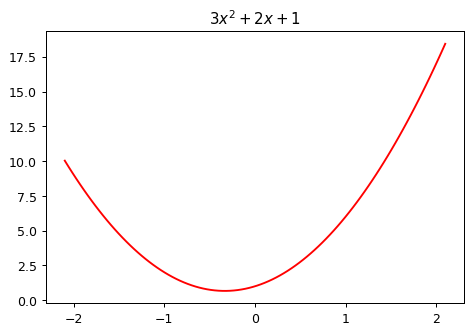

In [61]:
def f(x): return 3*x**2+2*x+1
#basic quadratic equation
plot_function(f,"$3x^2+2x+1$")

In [63]:
def quad(a,b,c,x): 
    return a*x**2+b*x+c

def mkquad(a,b,c): 
    return partial(quad,a,b,c)

#making the variable quadratic and a partialwith the constants constant

f = mkquad(3,2,1)

In [64]:
from numpy.random import normal, seed, uniform
np.random.seed(42)

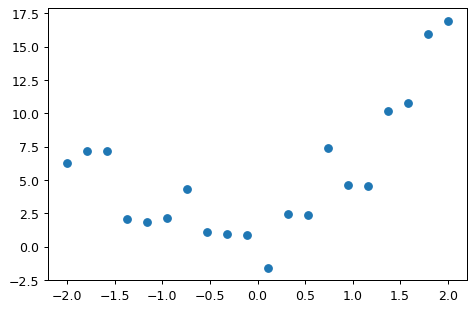

In [67]:
def noise(x,scale): 
    return normal(scale = scale, size = x.shape)

def add_noise(x,mult,add): 
    return x*(1+noise(x,mult))+noise(x,add)

x = torch.linspace(-2,2,steps = 20)[:,None]
y = add_noise(f(x),0.3,1.5)
plt.scatter(x,y);

#this is just creating our synth dataset using linspace, noice and scatter plotting it

In [68]:
from ipywidgets import interact

In [37]:
def mse(preds,acts): 
    return ((preds-acts)**2).mean()

#loss function

In [69]:
@interact(a =1.5,b = 1.5, c=1.5)
def plot_quad(a,b,c):
    f = mkquad(a,b,c)
    plt.scatter(x,y)
    loss = mse(f(x), y)
    plot_function(mkquad(a,b,c),ylim = (-3,12), title = f"MSE: {loss:.2f}")

#this is super intersting, an interactable version where we create a partial 
#quad and then plot our data and our formula and the mse

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [73]:
def quad_mse(params):
    f = mkquad(*params)
    return mse(f(x),y)

#provides loss function for our formula and our dataset 
#the only variables here are our a,b,c variables

In [100]:
abc = torch.tensor([1.5,1.5,1.5])
abc.requires_grad_()

#loss = quad_mse(abc)
#loss.backward()
#abc.grad

#provides the diretivate of the loss function 

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [101]:
quad_mse(abc)

tensor(9.2842, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [102]:
for i in range(5): 
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): 
        abc -= abc.grad*0.01
    print(f'loss = {loss:.2f}')

loss = 9.28
loss = 8.27
loss = 6.60
loss = 4.84
loss = 3.58


In [104]:
quad_mse(abc)

tensor(3.2560, dtype=torch.float64, grad_fn=<MeanBackward0>)